<a href="https://www.kaggle.com/code/gasparpm/traffic-insights?scriptVersionId=180635866" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting style
sns.set(style="whitegrid")

In [2]:
# Load vehicle traffic data
vehicle_traffic = pd.read_csv('/kaggle/input/vehicular-traffic-in-buenos-aires-2023/2023_vehicular_traffic.csv')

# Display the first few rows of the vehicle traffic data
print("Vehicle Traffic Data:")
print(vehicle_traffic.head())

Vehicle Traffic Data:
   MES  DIA  HORA ID_PEAJE    SENTIDO    TIPO_COBRO  PASOS
0    1    1     0      ALB     Centro  Mercado Pago      4
1    1    1     0      ALB  Provincia  Mercado Pago     13
2    1    1     0      ALB     Centro           Tag     16
3    1    1     0      ALB  Provincia           Tag    111
4    1    1     0      AVE     Centro      Efectivo    148


In [3]:
# Rename columns to match expected datetime format
vehicle_traffic.rename(columns={'MES': 'month', 'DIA': 'day'}, inplace=True)
vehicle_traffic['year'] = 2023

# Convert date-related columns to datetime format
vehicle_traffic['DATE'] = pd.to_datetime(vehicle_traffic[['year', 'month', 'day']])

# Drop unnecessary columns for this analysis
vehicle_traffic.drop(columns=['year', 'month', 'day'], inplace=True)

# Display the first few rows to verify changes
print("Cleaned Vehicle Traffic Data:")
print(vehicle_traffic.head())

Cleaned Vehicle Traffic Data:
   HORA ID_PEAJE    SENTIDO    TIPO_COBRO  PASOS       DATE
0     0      ALB     Centro  Mercado Pago      4 2023-01-01
1     0      ALB  Provincia  Mercado Pago     13 2023-01-01
2     0      ALB     Centro           Tag     16 2023-01-01
3     0      ALB  Provincia           Tag    111 2023-01-01
4     0      AVE     Centro      Efectivo    148 2023-01-01


In [4]:
# Group the data by hour and calculate the total number of vehicles
hourly_traffic = vehicle_traffic.groupby('HORA')['PASOS'].sum().reset_index()

# Display the hourly traffic data
print("Hourly Traffic Data:")
print(hourly_traffic)

Hourly Traffic Data:
    HORA    PASOS
0      0  2634729
1      1  1916009
2      2  1321559
3      3  1058649
4      4  1284759
5      5  2527503
6      6  4793712
7      7  7111028
8      8  7862875
9      9  7941841
10    10  8012030
11    11  8362176
12    12  8749228
13    13  8738479
14    14  8402091
15    15  8374905
16    16  8505298
17    17  8616730
18    18  8175679
19    19  7207154
20    20  6511189
21    21  5024296
22    22  3692762
23    23  2937626


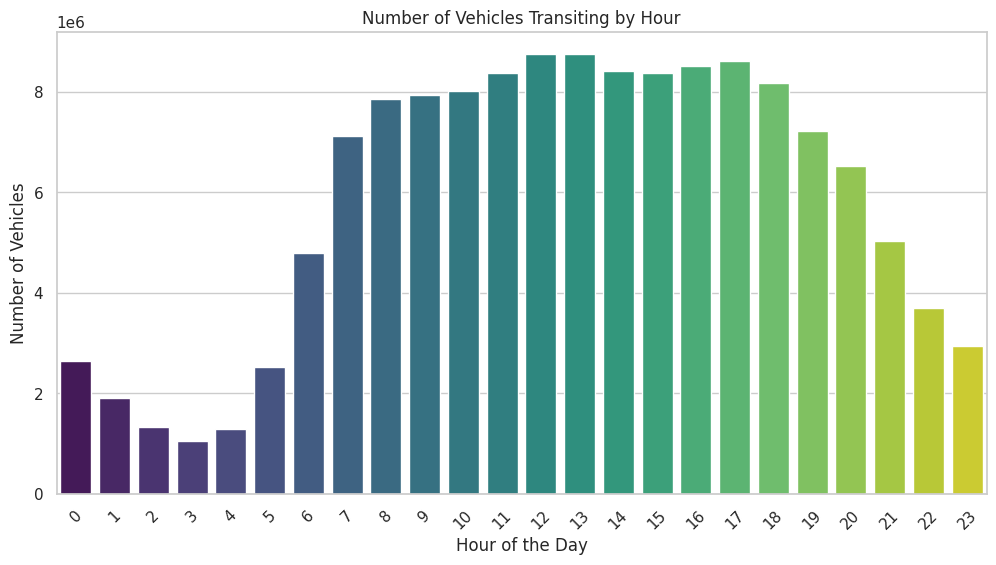

In [5]:
# Plot the number of vehicles transiting by hour
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_traffic, x='HORA', y='PASOS', palette='viridis')
plt.title('Number of Vehicles Transiting by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

Traffic Data by Payment Method:
           TIPO_COBRO     PASOS
0                 CPP       530
1             DEMORAS    197896
2            Efectivo  11211749
3              Exento   1574527
4        Mercado Pago  16851568
5                 N/D    240184
6           REC DEUDA    160951
7           Rec.Deuda   1475346
8                 Tag  92399655
9   Tarjeta Magnética     40577
10          Violación  15609324


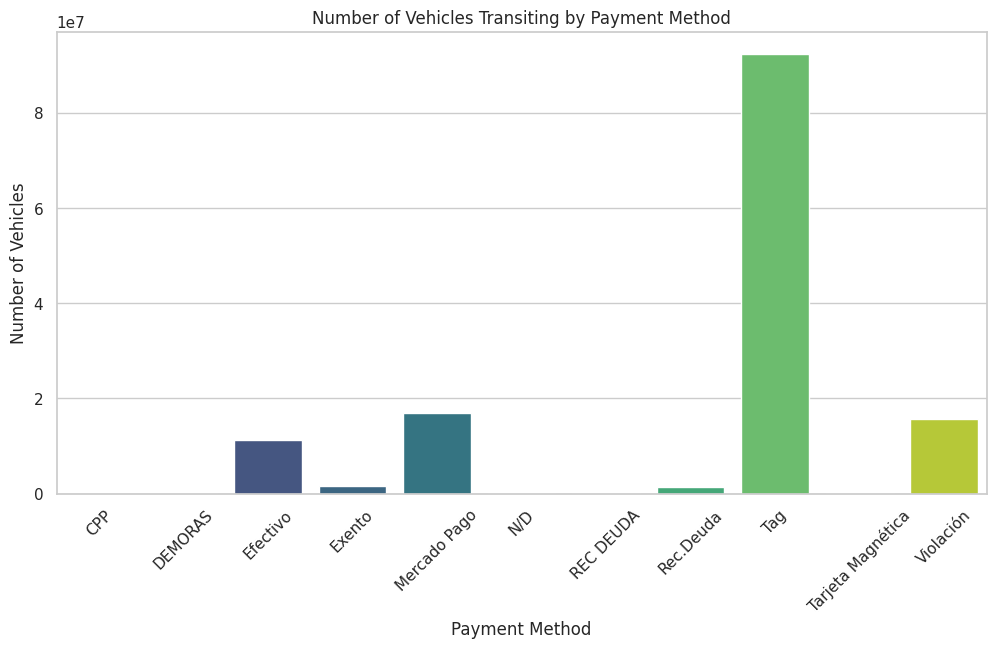

In [6]:
# Group the data by payment method and calculate the total number of vehicles
payment_traffic = vehicle_traffic.groupby('TIPO_COBRO')['PASOS'].sum().reset_index()

# Display the payment traffic data
print("Traffic Data by Payment Method:")
print(payment_traffic)

# Plot the number of vehicles transiting by payment method
plt.figure(figsize=(12, 6))
sns.barplot(data=payment_traffic, x='TIPO_COBRO', y='PASOS', palette='viridis')
plt.title('Number of Vehicles Transiting by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()